In [6]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [8]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# 2. Import data
# Define path
path = r'C:\Users\User\Documents\Career Foundry\Data Analytics Immersion\Data Immersion 6. Advanced Analytics & Dashboard Design'

# Import my dataset from the Excel file
df = pd.read_excel(os.path.join(path, '6.2', 'flavors_of_cacao_cleaned.xlsx'))

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ref                        2693 non-null   int64         
 1   company_name               2693 non-null   object        
 2   company_location           2693 non-null   object        
 3   review_date                2693 non-null   datetime64[ns]
 4   country_of_bean_origin     2693 non-null   object        
 5   bean_origin_or_bar         2693 non-null   object        
 6   cocoa_percent              2693 non-null   float64       
 7   ingredients                2693 non-null   object        
 8   memorable_characteristics  2693 non-null   object        
 9   rating                     2693 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 210.5+ KB
None


In [14]:
print(df.head())

   ref            company_name company_location review_date  \
0    5           Jacque Torres              USA  2006-01-01   
1   15  Green & Black's (ICAM)               UK  2006-01-01   
2   15                Guittard              USA  2006-01-01   
3   15     Neuhaus (Callebaut)          Belgium  2006-01-01   
4   15     Neuhaus (Callebaut)          Belgium  2006-01-01   

  country_of_bean_origin   bean_origin_or_bar  cocoa_percent   ingredients  \
0                  Ghana  Trinatario Treasure           0.71  5- B,S,C,V,L   
1     Multiple Countries                 Dark           0.70  5- B,S,C,V,L   
2               Colombia              Chucuri           0.65  5- B,S,C,V,L   
3               Sao Tome             Sao Tome           0.75  5- B,S,C,V,L   
4     Multiple Countries          West Africa           0.73  5- B,S,C,V,L   

        memorable_characteristics  rating  
0    gritty, unrefined, off notes    2.00  
1      mildly rich, basic, roasty    2.50  
2  creamy, sweet, fl

In [16]:
# Extract only the ingredient codes (remove the count before "- ")
df["ingredients"] = df["ingredients"].str.split("- ", expand=True)[1]

# Split ingredients into separate columns
df_ingredients = df["ingredients"].str.get_dummies(sep=",")

# Merge one-hot encoded ingredients with original dataset
df = df.join(df_ingredients)

# Drop the original 'ingredients' column as it's now encoded
df = df.drop(columns=["ingredients"])

# Display the updated dataframe
df.head()

,ref,company_name,company_location,review_date,country_of_bean_origin,bean_origin_or_bar,cocoa_percent,memorable_characteristics,rating,L,B,C,L,S,S*,Sa,V
0,5,Jacque Torres,USA,2006-01-01,Ghana,Trinatario Treasure,0.71,"gritty, unrefined, off notes",2.00,0,1,1,1,1,0,0,1
1,15,Green & Black's (ICAM),UK,2006-01-01,Multiple Countries,Dark,0.70,"mildly rich, basic, roasty",2.50,0,1,1,1,1,0,0,1
2,15,Guittard,USA,2006-01-01,Colombia,Chucuri,0.65,"creamy, sweet, floral, vanilla",3.00,0,1,1,1,1,0,0,1
3,15,Neuhaus (Callebaut),Belgium,2006-01-01,Sao Tome,Sao Tome,0.75,"grassy, earthy, burnt",2.75,0,1,1,1,1,0,0,1
4,15,Neuhaus (Callebaut),Belgium,2006-01-01,Multiple Countries,West Africa,0.73,"non descript, poor aftertaste",2.00,0,1,1,1,1,0,0,1


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ref                        2693 non-null   int64         
 1   company_name               2693 non-null   object        
 2   company_location           2693 non-null   object        
 3   review_date                2693 non-null   datetime64[ns]
 4   country_of_bean_origin     2693 non-null   object        
 5   bean_origin_or_bar         2693 non-null   object        
 6   cocoa_percent              2693 non-null   float64       
 7   memorable_characteristics  2693 non-null   object        
 8   rating                     2693 non-null   float64       
 9    L                         2693 non-null   int64         
 10  B                          2693 non-null   int64         
 11  C                          2693 non-null   int64         
 12  L     

In [22]:
# Drop only the non-numerical columns (excluding 'ingredients' since it's already encoded)
df_numeric = df.drop(columns=[
    "ref", "company_name", "company_location", "review_date",
    "country_of_bean_origin", "bean_origin_or_bar", "memorable_characteristics"
])

# Display the final processed dataset
df_numeric.head()

,cocoa_percent,rating,L,B,C,L,S,S*,Sa,V
0,0.71,2.00,0,1,1,1,1,0,0,1
1,0.70,2.50,0,1,1,1,1,0,0,1
2,0.65,3.00,0,1,1,1,1,0,0,1
3,0.75,2.75,0,1,1,1,1,0,0,1
4,0.73,2.00,0,1,1,1,1,0,0,1


In [53]:
# 3. Use elbow technique
num_cl = range(1, 10)  # Defines the range of potential clusters
kmeans = [KMeans(n_clusters=i).fit(df_numeric) for i in num_cl]  # Fits k-means models
score = [kmeans[i].score(df_numeric) for i in range(len(kmeans))] 
# Display the scores
score

[-3547.839266078722,
 -2235.094419977003,
 -1142.5327453126658,
 -1023.5411510646571,
 -879.0893351767998,
 -768.2401766595896,
 -685.806612366326,
 -567.567010878987,
 -428.6675660238349]

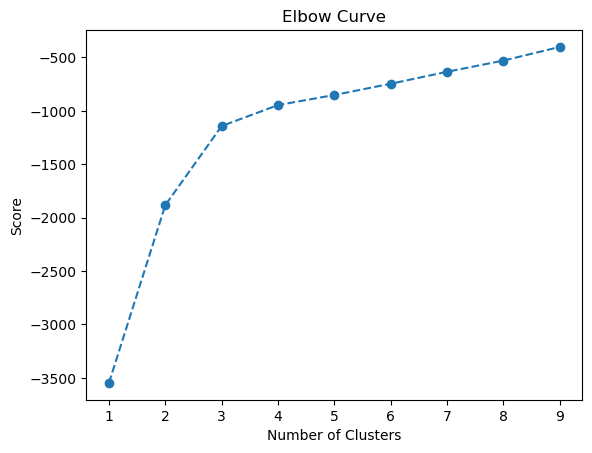

In [55]:
# Fit K-Means models and get score values
num_cl = range(1, 10)  
kmeans = [KMeans(n_clusters=i).fit(df_numeric) for i in num_cl]  
score = [kmeans[i].score(df_numeric) for i in range(len(kmeans))]  # Using .score()

# Plot the elbow curve using PyLab
pl.plot(num_cl, score, marker='o', linestyle='--')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4a. I chose k=3 because the increase in score slows down after 3 clusters.

### 5. Run the k-means algorithm.
### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [36]:
# Create the k-means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  

# Fit and predict cluster labels
df_numeric["clusters"] = kmeans.fit_predict(df_numeric)

# Display the dataset with assigned clusters
df_numeric.head()

,cocoa_percent,rating,L,B,C,L,S,S*,Sa,V,clusters
0,0.71,2.00,0,1,1,1,1,0,0,1,2
1,0.70,2.50,0,1,1,1,1,0,0,1,2
2,0.65,3.00,0,1,1,1,1,0,0,1,2
3,0.75,2.75,0,1,1,1,1,0,0,1,2
4,0.73,2.00,0,1,1,1,1,0,0,1,2


In [38]:
df_numeric['clusters'].value_counts()

clusters
1    1287
0     915
2     491
Name: count, dtype: int64

### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

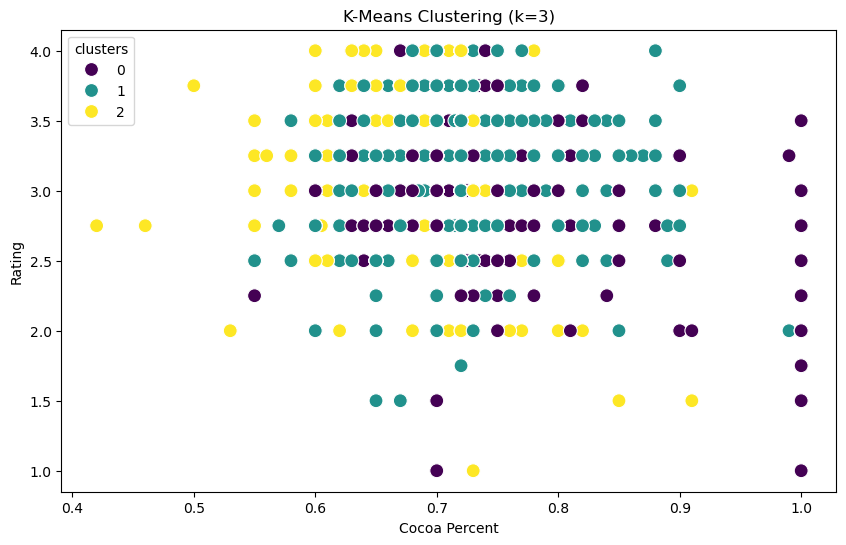

In [46]:
plt.figure(figsize=(10,6))

# Scatter plot for clusters
ax = sns.scatterplot(x=df_numeric["cocoa_percent"], 
                     y=df_numeric["rating"], 
                     hue=df_numeric["clusters"], 
                     palette="viridis", 
                     s=100)

# Remove grid background
ax.grid(False) 

# Labels and title
plt.xlabel("Cocoa Percent")  
plt.ylabel("Rating")  
plt.title("K-Means Clustering (k=3)")

# Show the plot
plt.show()

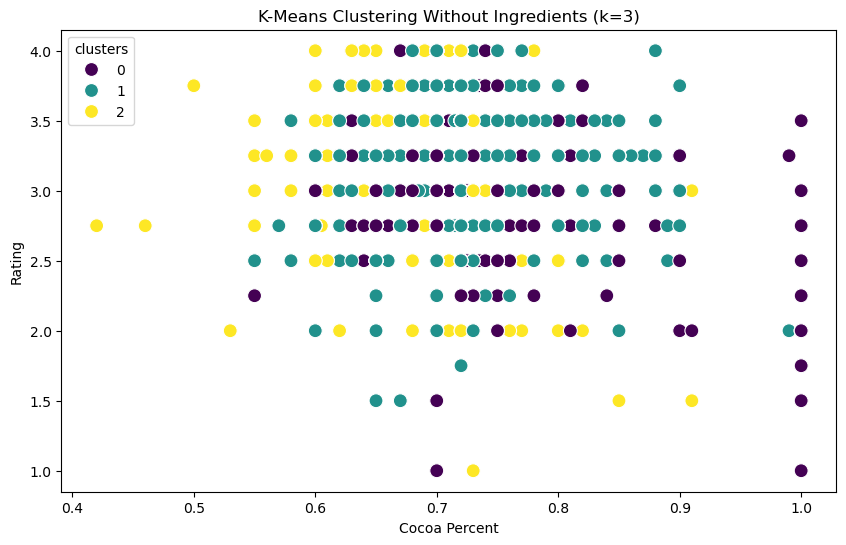

In [50]:
df_numeric_no_ingredients = df_numeric.drop(columns=["B", "C", "L", "S", "V", "Sa", "S*"])  # Drop ingredient columns

# Run k-means again
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric_no_ingredients["clusters"] = kmeans.fit_predict(df_numeric_no_ingredients)

# Plot the new clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_numeric_no_ingredients["cocoa_percent"], 
                y=df_numeric_no_ingredients["rating"], 
                hue=df_numeric_no_ingredients["clusters"], 
                palette="viridis", s=100)
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.title("K-Means Clustering Without Ingredients (k=3)")
plt.show()

### Cluster Analysis

Clusters still overlap quite a bit, but that is expected because cocoa_percent and rating are limited in how much they can separate chocolates. Removing ingredients did not drastically change the cluster shapes, meaning that the binary ingredient data was not a strong factor in defining the clusters.

Although other variables might be useful, such as country_of_bean_origin and bean_origin_or_bar, they were not included in this analysis because k-means can only process numerical data.

### Observations Based on Cluster Colors

- Cluster 2 (yellow) mostly appears in cocoa percentages around 0.4 - 0.5, suggesting it represents low-cocoa chocolates that are likely sweeter.  
- Cluster 1 (blue) is mostly found between 0.5 - 0.9 cocoa percent, indicating it contains medium-to-high cocoa chocolates that might have a balanced flavor.  
- Cluster 0 (purple) appears almost exclusively at 100% cocoa, meaning this cluster represents very high cocoa chocolates, which may be more bitter and less preferred.  

The clustering suggests that cocoa percentage plays a role in grouping chocolates, but there is still overlap, meaning other factors might influence ratings and clustering results. Checking the descriptive statistics might give us more insight into how the clusters differ.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [68]:
df_numeric.groupby("clusters").agg({
    "cocoa_percent": ["mean", "median"],
    "rating": ["mean", "median"]
})

cocoa_percent           rating       
                  mean median      mean median
clusters                                      
0             0.725169    0.7  3.163388   3.25
1             0.715816    0.7  3.236597   3.25
2             0.699196    0.7  3.160387   3.25

### Descriptive Statistics Analysis  

The cluster distribution suggests that cocoa percentage plays a role in grouping chocolates, but the descriptive statistics show that the differences between clusters are relatively small.  

- Cluster 2 (yellow) mostly appears in cocoa percentages around 0.4 - 0.5, representing lower cocoa chocolates. Despite being sweeter, this cluster does not have significantly higher ratings, with an average rating of 3.16. This suggests that lower cocoa content does not necessarily lead to better consumer preference.  
- Cluster 1 (blue) is mostly found between 0.5 - 0.9 cocoa percent, representing medium-to-high cocoa chocolates. It has the highest average rating (3.24), indicating that chocolates in this range may be the most well-balanced and preferred by consumers.  
- Cluster 0 (purple) appears almost exclusively at 100% cocoa, meaning this cluster represents very high cocoa chocolates. It also has the highest average cocoa percentage (0.725) but a slightly lower rating (3.16). This suggests that while high-cocoa chocolates may appeal to certain consumers, they are generally rated lower, possibly due to bitterness.  

Since all clusters have a similar median cocoa percentage (0.7) and rating (3.25), the clustering is not forming highly distinct groups based on these two variables alone. Other factors, such as country of origin, bean type, or brand reputation, may play a larger role in influencing chocolate ratings.

### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

### Future Use of These Results  

The clustering results provide some insights into how cocoa percentage relates to chocolate ratings, but I wonder if incorporating non-numeric variables, such as country of origin or bean type, could improve the analysis. Since k-means only works with numerical data, I am not sure how these categorical variables could be included, but it might be worth exploring.  

I also wonder whether there is another clustering method that can use both numerical and categorical data, which might reveal patterns better.  